# Проект: классификация

In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing  import LabelBinarizer
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.model_selection import GridSearchCV

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [314]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [315]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
display(df.info())
print('number of Nulls in "balance" {}'.format(df['balance'].isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


None

number of Nulls in "balance" 25




Данные о клиентах банка:

        age (возраст);
        job (сфера занятости);
        marital (семейное положение);
        education (уровень образования);
        default (имеется ли просроченный кредит);
        housing (имеется ли кредит на жильё);
        loan (имеется ли кредит на личные нужды);
        balance (баланс).

Данные, связанные с последним контактом в контексте текущей маркетинговой кампании:

        contact (тип контакта с клиентом);
        month (месяц, в котором был последний контакт);
        day (день, в который был последний контакт);
        duration (продолжительность контакта в секундах).

Прочие признаки:

        campaign (количество контактов с этим клиентом в течение текущей кампании);
        pdays (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании);
        previous (количество контактов до текущей кампании)
        poutcome (результат прошлой маркетинговой кампании).

И, разумеется, наша целевая переменная deposit, которая определяет, согласится ли клиент открыть депозит в банке. Именно её мы будем пытаться предсказать в данном кейсе.


### Задание 2

In [316]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
display(df['job'].unique())
display(df['job'].value_counts())


array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [317]:
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


In [318]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
#s= "2 343,00 $"
#print(s.replace(",00", "").replace("$", "").replace(" ", ""))

df['balance'] = df['balance'].apply(lambda x: str(x).replace(",00", "").replace("$", "").replace(" ", ""))
df['balance'] = df['balance'].astype('float')
display(df)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


### Задание 4

In [319]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
print(df['balance'].mean())
print(df['balance'].median())
balance_median = df['balance'].median()
df['balance'] = df['balance'].fillna(balance_median)
print(df['balance'].mean())
print(df['balance'].median())

1529.1290293615875
550.0
1526.9360329690019
550.0


### Задание 5

In [320]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
display(df['job'].value_counts())
display(df['education'].value_counts())

job_mode = df['job'].mode()[0]
education_mode = df['education'].mode()[0]

df['job'] = df['job'].apply(lambda x: job_mode if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x: education_mode if x == 'unknown' else x)

display(df['job'].value_counts())
display(df['education'].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [321]:
print(f"средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования {df[(df['job'] == job_mode) & (df['education'] == education_mode)]['balance'].mean()}")


средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования 1598.8829787234042


### Задание 6

lower_bound:-2241.0,  upper_bound:4063.0
Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


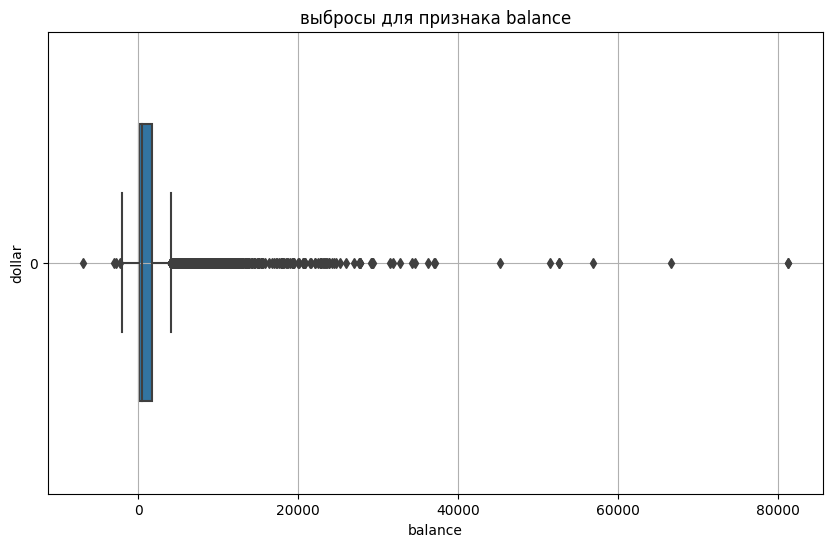

In [322]:
# удалите все выбросы для признака balance
# ваш код

fig = plt.figure(figsize=(10,6))
boxplot = sns.boxplot(
    data=df['balance'],
    orient='h',
    width=0.6,
  )
boxplot.set_title('выбросы для признака balance');
boxplot.set_xlabel('balance');
boxplot.set_ylabel('dollar');
boxplot.grid()
#boxplot.figure.set_size_inches(10, 8)


def outliers_iqr_mod_log(data, column, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[column])
    else:
        x = data[column]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    print(f"lower_bound:{lower_bound},  upper_bound:{upper_bound}" )
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr_mod_log(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')



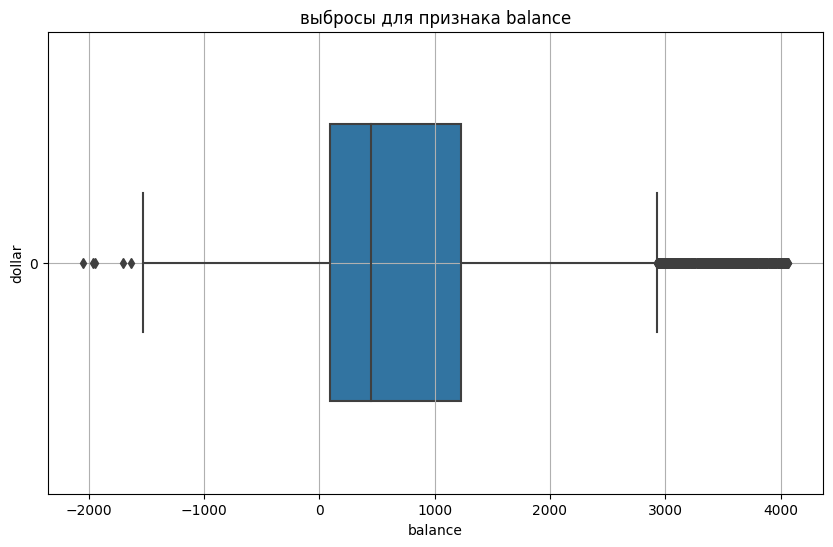

In [323]:
fig = plt.figure(figsize=(10,6))
boxplot = sns.boxplot(
    data=cleaned['balance'],
    orient='h',
    width=0.6,
  )
boxplot.set_title('выбросы для признака balance');
boxplot.set_xlabel('balance');
boxplot.set_ylabel('dollar');
boxplot.grid()
#boxplot.figure.set_size_inches(10, 8)

## Часть 2:  Разведывательный анализ

### Задание 1

no     5424
yes    4681
Name: deposit, dtype: int64

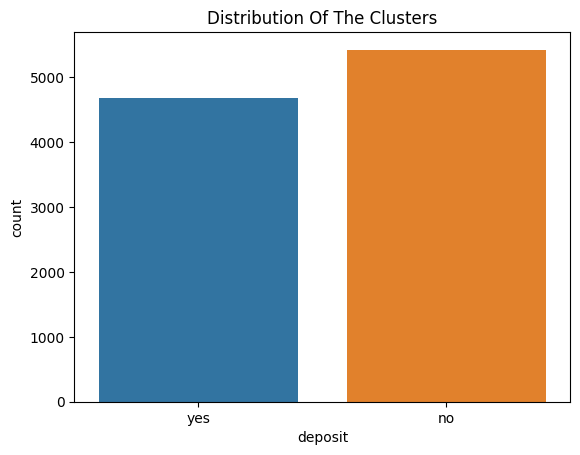

In [324]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код
display(cleaned['deposit'].value_counts())
pl = sns.countplot(x=cleaned['deposit'])
pl.set_title("Distribution Of The Clusters")
plt.show()

### Задания 2 и 3

In [325]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
print("максимальный возраст клиента:", cleaned['age'].max())
print("минимальная продолжительность разговора sec", cleaned['duration'].min())

максимальный возраст клиента: 95
минимальная продолжительность разговора sec 2


### Задания 4 и 5

месяцев, в которых проводилась маркетинговая кампания  12


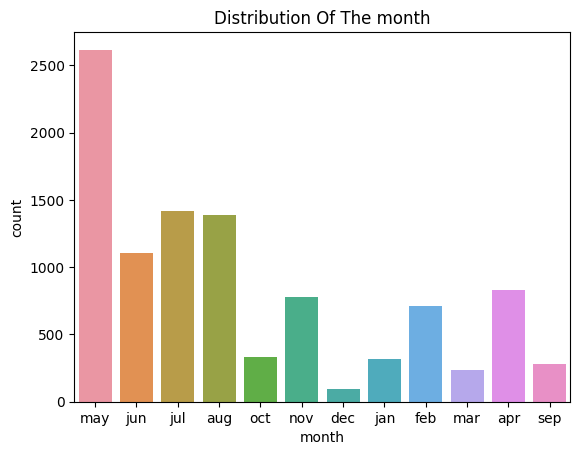

сфер занятости представлено среди клиентов банка  11


management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

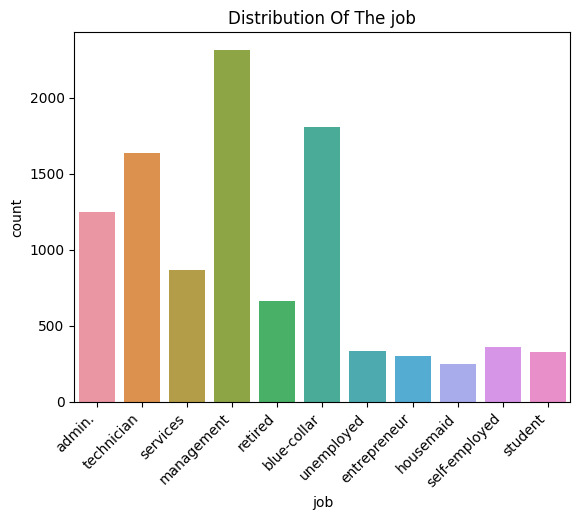

In [326]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
print("месяцев, в которых проводилась маркетинговая кампания ", len(cleaned['month'].unique().tolist()))
pl = sns.countplot(x=cleaned['month'])
pl.set_title("Distribution Of The month")
plt.show()


print("сфер занятости представлено среди клиентов банка ", len(cleaned['job'].unique().tolist()))
display(cleaned['job'].value_counts())
pl = sns.countplot(x=cleaned['job'])
pl.set_title("Distribution Of The job")
pl.set_xticklabels(pl.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




емейное положение среди клиентов банка  ['married' 'single' 'divorced']


,marital,counts
0,divorced,1177
1,married,5715
2,single,3213


,marital,count
0,divorced,1177
1,married,5715
2,single,3213


самое распостраненное семейное положение married


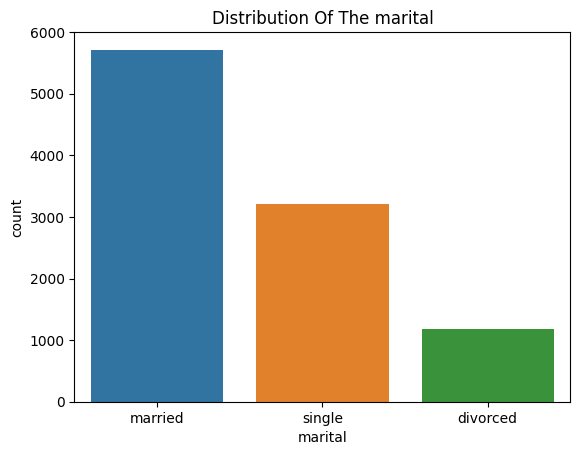

образование среди клиентов банка  ['secondary' 'tertiary' 'primary']


secondary    5517
tertiary     3239
primary      1349
Name: education, dtype: int64

самое распостраненное образование secondary


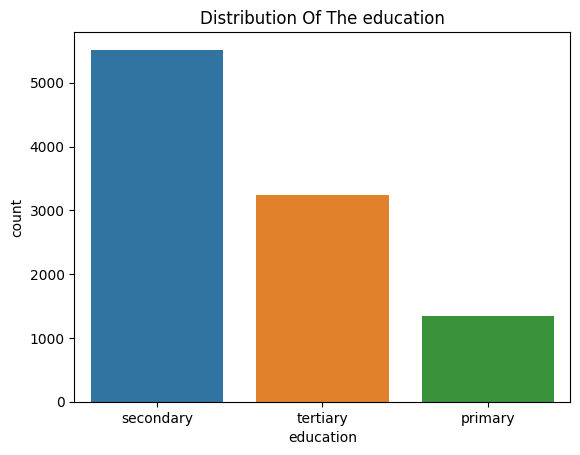

In [327]:
print("емейное положение среди клиентов банка ", cleaned['marital'].unique())
#display(cleaned['marital'].value_counts().sort_values(ascending=False))
display(cleaned.groupby(['marital'])['marital'].size().reset_index(name='counts'))
display(cleaned.groupby(['marital'])['marital'].agg(['count']).reset_index())
print("самое распостраненное семейное положение", cleaned.groupby(['marital'])['marital'].agg(['count']).reset_index().sort_values(by='count', ascending=False).iloc[0][0])

pl = sns.countplot(x=cleaned['marital'])
pl.set_title("Distribution Of The marital")
plt.show()

print("образование среди клиентов банка ", cleaned['education'].unique())
display(cleaned['education'].value_counts())
print("самое распостраненное образование", cleaned.groupby(['education'])['education'].agg(['count']).reset_index().sort_values(by='count', ascending=False).iloc[0][0])

pl = sns.countplot(x=cleaned['education'])
pl.set_title("Distribution Of The education")
plt.show()

In [328]:
display(cleaned['marital'].value_counts().nlargest(n=1) )
print("самое распостраненное семейное положение", cleaned['marital'].mode()[0])
display(cleaned['marital'].value_counts().reset_index())
display(cleaned['marital'].value_counts().reset_index().sort_values(by='marital', ascending=False).iloc[0][0])


married    5715
Name: marital, dtype: int64

самое распостраненное семейное положение married


,index,marital
0,married,5715
1,single,3213
2,divorced,1177


'married'

### Задание 6

статуса предыдущей кампании  ['unknown' 'other' 'failure' 'success']


poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


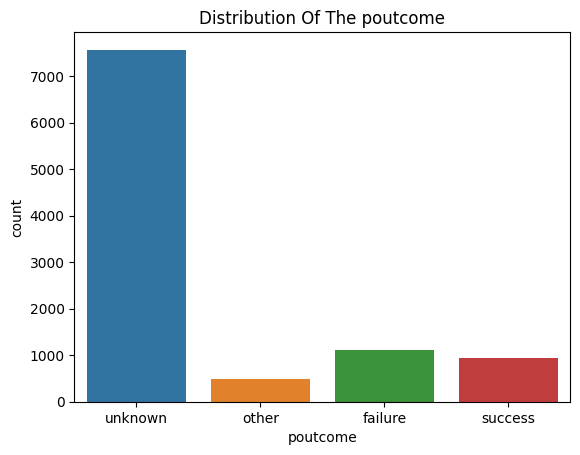

In [329]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
print("статуса предыдущей кампании ", cleaned['poutcome'].unique())
display(cleaned.groupby(['poutcome'])['deposit'].value_counts())
display(cleaned.groupby(['poutcome'])['deposit'].value_counts().unstack())


pl = sns.countplot(x=cleaned['poutcome'])
pl.set_title("Distribution Of The poutcome")
plt.show()

### Задание 7

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


месяцев, в которых проводилась маркетинговая кампания  12


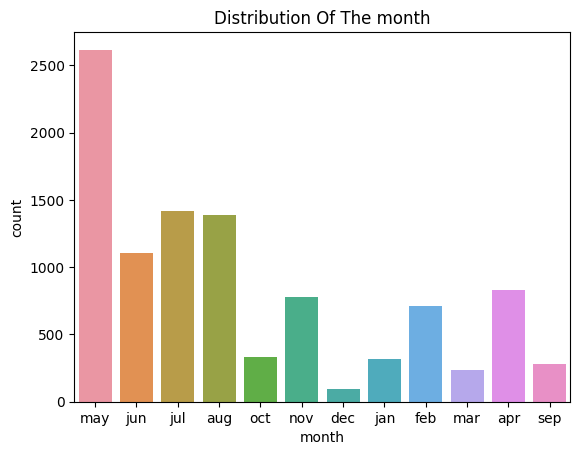

for month may the ratio 0.6786396637371036
for month jun the ratio 0.5489130434782609
for month jul the ratio 0.5895627644569816
for month aug the ratio 0.5595667870036101
for month oct the ratio 0.18507462686567164
for month nov the ratio 0.5846153846153846
for month dec the ratio 0.0967741935483871
for month jan the ratio 0.6081504702194357
for month feb the ratio 0.45557122708039494
for month mar the ratio 0.10126582278481013
for month apr the ratio 0.3819277108433735
for month sep the ratio 0.16546762589928057


In [330]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
display(cleaned.describe(include = 'object'))
print("месяцев, в которых проводилась маркетинговая кампания ", len(cleaned['month'].unique().tolist()))
pl = sns.countplot(x=cleaned['month'])
pl.set_title("Distribution Of The month")
plt.show()

for elem in cleaned['month'].unique().tolist():
    print(f"for month {elem} the ratio {cleaned[cleaned['month'] == elem][cleaned['deposit'] == 'no']['deposit'].count() / cleaned[cleaned['month'] == elem]['deposit'].count()}")

### Задание 8

Создайте новую переменную, в которой будет находиться индикатор принадлежности к одной из следующих категорий:

        '<30';
        '30-40';
        '40-50';
        '50-60';
        '60+'.

Совет. После создания этой переменной постройте диаграмму (на ваш вкус), которая, с вашей точки зрения, сможет наилучшим образом отобразить различия в количестве открытых/не открытых депозитов для каждой возрастной группы.

In [331]:
def age_range(x):
    if x < 30:
        return 0
    elif x in range(30,40):
        return 1
    elif x in range(40,50):
        return 2
    elif x in range(50,60):
        return 3
    elif x >= 60:
        return 4

print(age_range(53))

3


In [332]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
cleaned['age_range'] = cleaned['age'].apply(age_range)


1    1716
2     938
0     861
3     670
4     496
Name: age_range, dtype: int64

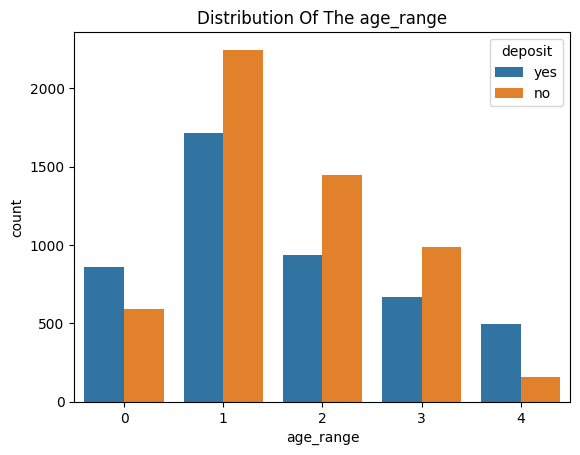

In [333]:
display(cleaned[cleaned['deposit'] == 'yes']['age_range'].value_counts())
#display(cleaned['age_range'])
pl = sns.countplot(x="age_range", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The age_range")
plt.show()

<AxesSubplot: xlabel='age_group', ylabel='count'>

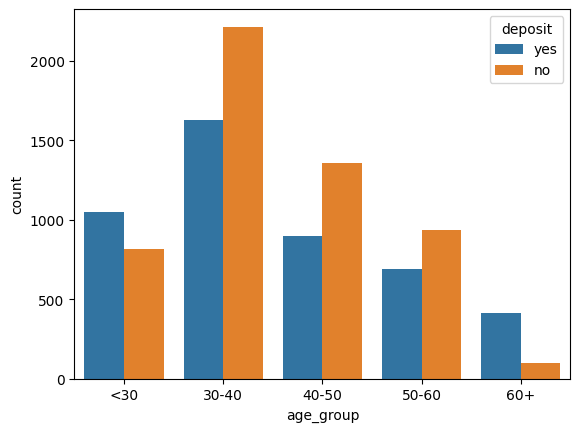

In [334]:

cleaned['age_group'] = pd.cut(cleaned.age, [0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
sns.countplot(x="age_group", hue="deposit", data=cleaned)

### Задания 9 и 10

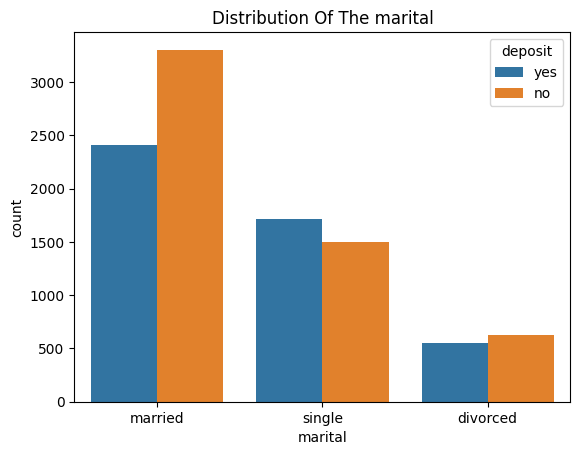

In [335]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
pl = sns.countplot(x="marital", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The marital")
plt.show()

Больше клиентов в статусе married,но склонны открывать в статусе single

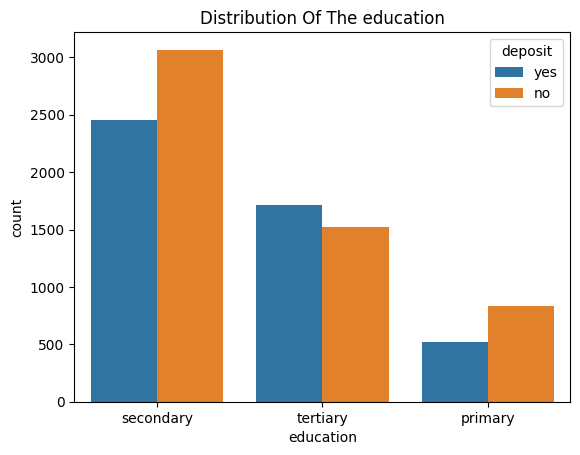

In [336]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
pl = sns.countplot(x="education", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The education")
plt.show()

Больше клиентов в статусе secondary, но склонны открывать в статусе tertiary 

management       2315
blue-collar      1807
technician       1638
admin.           1246
services          868
retired           663
self-employed     358
unemployed        332
student           326
entrepreneur      300
housemaid         252
Name: job, dtype: int64

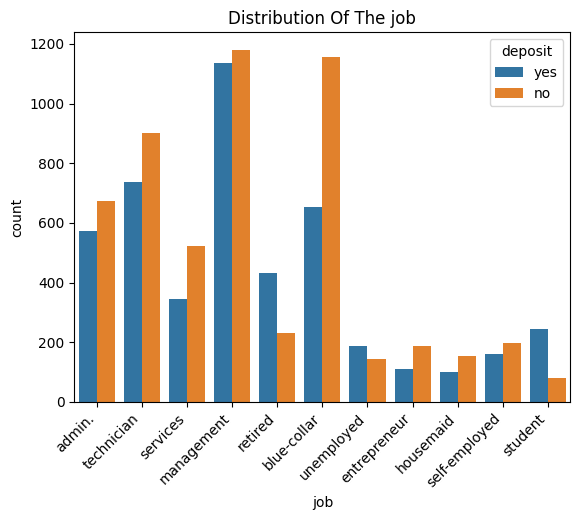

In [337]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
display(cleaned['job'].value_counts())

pl = sns.countplot(x="job", hue="deposit", data=cleaned)
pl.set_title("Distribution Of The job")
pl.set_xticklabels(pl.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()


Больше клиентов в статусе managent и blue-collar,но склонны открывать в статусе retired, unemployed и student

### Задание 11

In [338]:
#Разделите таблицу на две части: для тех, кто открыл депозит, и для тех, кто не открыл. 
# ля каждой части постройте сводную диаграмму по уровню образования и семейному положению. 
# Представьте результаты в виде тепловых карт. Различаются ли наиболее популярные группы для открывших депозит и для неоткрывших? 
# Какой вывод вы можете сделать, исходя из полученных данных?

# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
# Для начала отфильтруйте в отдельные таблицы тех, кто согласился открыть депозит, и тех, кто не согласился. После этого 
# составьте сводные таблицы и визуализируйте их с помощью тепловых карт. 
# Рекомендуется использовать crosstab().


education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


marital   education
divorced  primary        96
          secondary     283
          tertiary      174
married   primary       339
          secondary    1289
          tertiary      784
single    primary        82
          secondary     879
          tertiary      755
Name: deposit, dtype: int64

education,primary,secondary,tertiary
marital,,,
divorced,96,283,174
married,339,1289,784
single,82,879,755


<AxesSubplot: xlabel='education', ylabel='marital'>

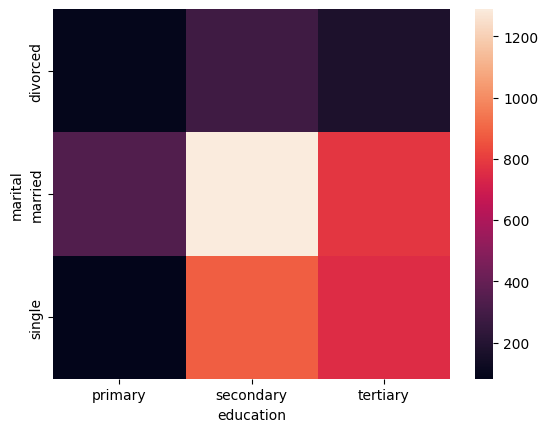

In [339]:
cleaned_open = cleaned[cleaned['deposit'] == 'yes']
cleaned_notopen = cleaned[cleaned['deposit'] == 'no']

display(cleaned_open.pivot_table(values='deposit', index='marital', columns='education', aggfunc='count', margins=False))

display(cleaned_open.groupby(['marital', 'education']).agg('count')['deposit'])

display(pd.crosstab(cleaned_open['marital'], cleaned_open['education']))

sns.heatmap(pd.crosstab(cleaned_open['marital'], cleaned_open['education']))


## Часть 3: преобразование данных

### Задание 1

In [340]:
# преобразуйте уровни образования
#Закодируем категориальные признаки. Так как у нас их мало (Education и Living_With), можем смело использовать LabelEncoder().
LE = LabelEncoder()
cleaned['education'] = LE.fit_transform(cleaned['education'])
cleaned.head()
print(cleaned['education'].sum())

11995


In [341]:
LE = LabelEncoder()
cleaned['age_group'] = LE.fit_transform(cleaned['age_group'])
cleaned.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_range,age_group
0,59,admin.,married,1,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,3,2
1,56,admin.,married,1,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,3,2
2,41,technician,married,1,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2,1
3,55,services,married,1,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3,2
4,54,admin.,married,2,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes,3,2


### Задания 2 и 3

In [342]:
# преобразуйте бинарные переменные в представление из нулей и единиц
cleaned['deposit'] = cleaned['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
cleaned.head()
cleaned.describe()

,age,education,balance,day,duration,campaign,pdays,previous,deposit,age_range,age_group
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,1.187036,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230,0.463236,1.612964,1.437308
std,11.734931,0.647373,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795,0.498671,1.113746,1.489490
min,18.000000,0.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,1.000000
75%,48.000000,2.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000
max,95.000000,2.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000,1.000000,4.000000,4.000000


In [343]:
LB = LabelBinarizer()
cleaned['default'] = LB.fit_transform(cleaned['default'])
cleaned['housing'] = LB.fit_transform(cleaned['housing'])
cleaned['loan'] = LB.fit_transform(cleaned['loan'])
cleaned.head()
cleaned.describe()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,age_range,age_group
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,1.187036,0.016428,807.653538,0.481148,0.137853,15.590302,368.742603,2.517170,51.319644,0.816230,0.463236,1.612964,1.437308
std,11.734931,0.647373,0.127119,994.151966,0.499669,0.344762,8.441510,346.651524,2.707159,109.644179,2.243795,0.498671,1.113746,1.489490
min,18.000000,0.000000,0.000000,-2049.000000,0.000000,0.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,0.000000,95.000000,0.000000,0.000000,8.000000,137.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
50%,38.000000,1.000000,0.000000,445.000000,0.000000,0.000000,15.000000,252.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,1.000000
75%,48.000000,2.000000,0.000000,1227.000000,1.000000,0.000000,22.000000,490.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000
max,95.000000,2.000000,1.000000,4063.000000,1.000000,1.000000,31.000000,3881.000000,43.000000,854.000000,58.000000,1.000000,4.000000,4.000000


In [344]:
print(cleaned['default'].mean() + cleaned['housing'].mean() + cleaned['loan'].mean())

0.6354280059376547


### Задание 4

In [345]:
# создайте дамми-переменные

categ = ['job', 'marital', 'contact', 'month', 'poutcome']

dummies_data = pd.get_dummies(cleaned, columns=categ, drop_first=False)
dummies_data.head()

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,1,0,2343.0,1,0,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,1,0,45.0,0,0,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,1,0,1270.0,1,0,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,1,0,2476.0,1,0,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,2,0,184.0,0,0,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


In [346]:
display(dummies_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   education          10105 non-null  int32  
 2   default            10105 non-null  int32  
 3   balance            10105 non-null  float64
 4   housing            10105 non-null  int32  
 5   loan               10105 non-null  int32  
 6   day                10105 non-null  int64  
 7   duration           10105 non-null  int64  
 8   campaign           10105 non-null  int64  
 9   pdays              10105 non-null  int64  
 10  previous           10105 non-null  int64  
 11  deposit            10105 non-null  int64  
 12  age_range          10105 non-null  int64  
 13  age_group          10105 non-null  int32  
 14  job_admin.         10105 non-null  uint8  
 15  job_blue-collar    10105 non-null  uint8  
 16  job_entrepreneur   101

None

### Задания 5 и 6

age                  0.024357
education            0.098253
default             -0.038872
balance              0.135893
housing             -0.200290
loan                -0.107240
day                 -0.056878
duration             0.457818
campaign            -0.130707
pdays                0.147917
previous             0.141102
deposit              1.000000
age_range            0.006365
age_group            0.133641
job_admin.          -0.001927
job_blue-collar     -0.095845
job_entrepreneur    -0.032706
job_housemaid       -0.022572
job_management       0.029566
job_retired          0.100090
job_self-employed   -0.005194
job_services        -0.040433
job_student          0.105563
job_technician      -0.011190
job_unemployed       0.039196
marital_divorced     0.004808
marital_married     -0.094246
marital_single       0.097005
contact_cellular     0.223944
contact_telephone    0.007064
contact_unknown     -0.249294
month_apr            0.092888
month_aug           -0.018225
month_dec 

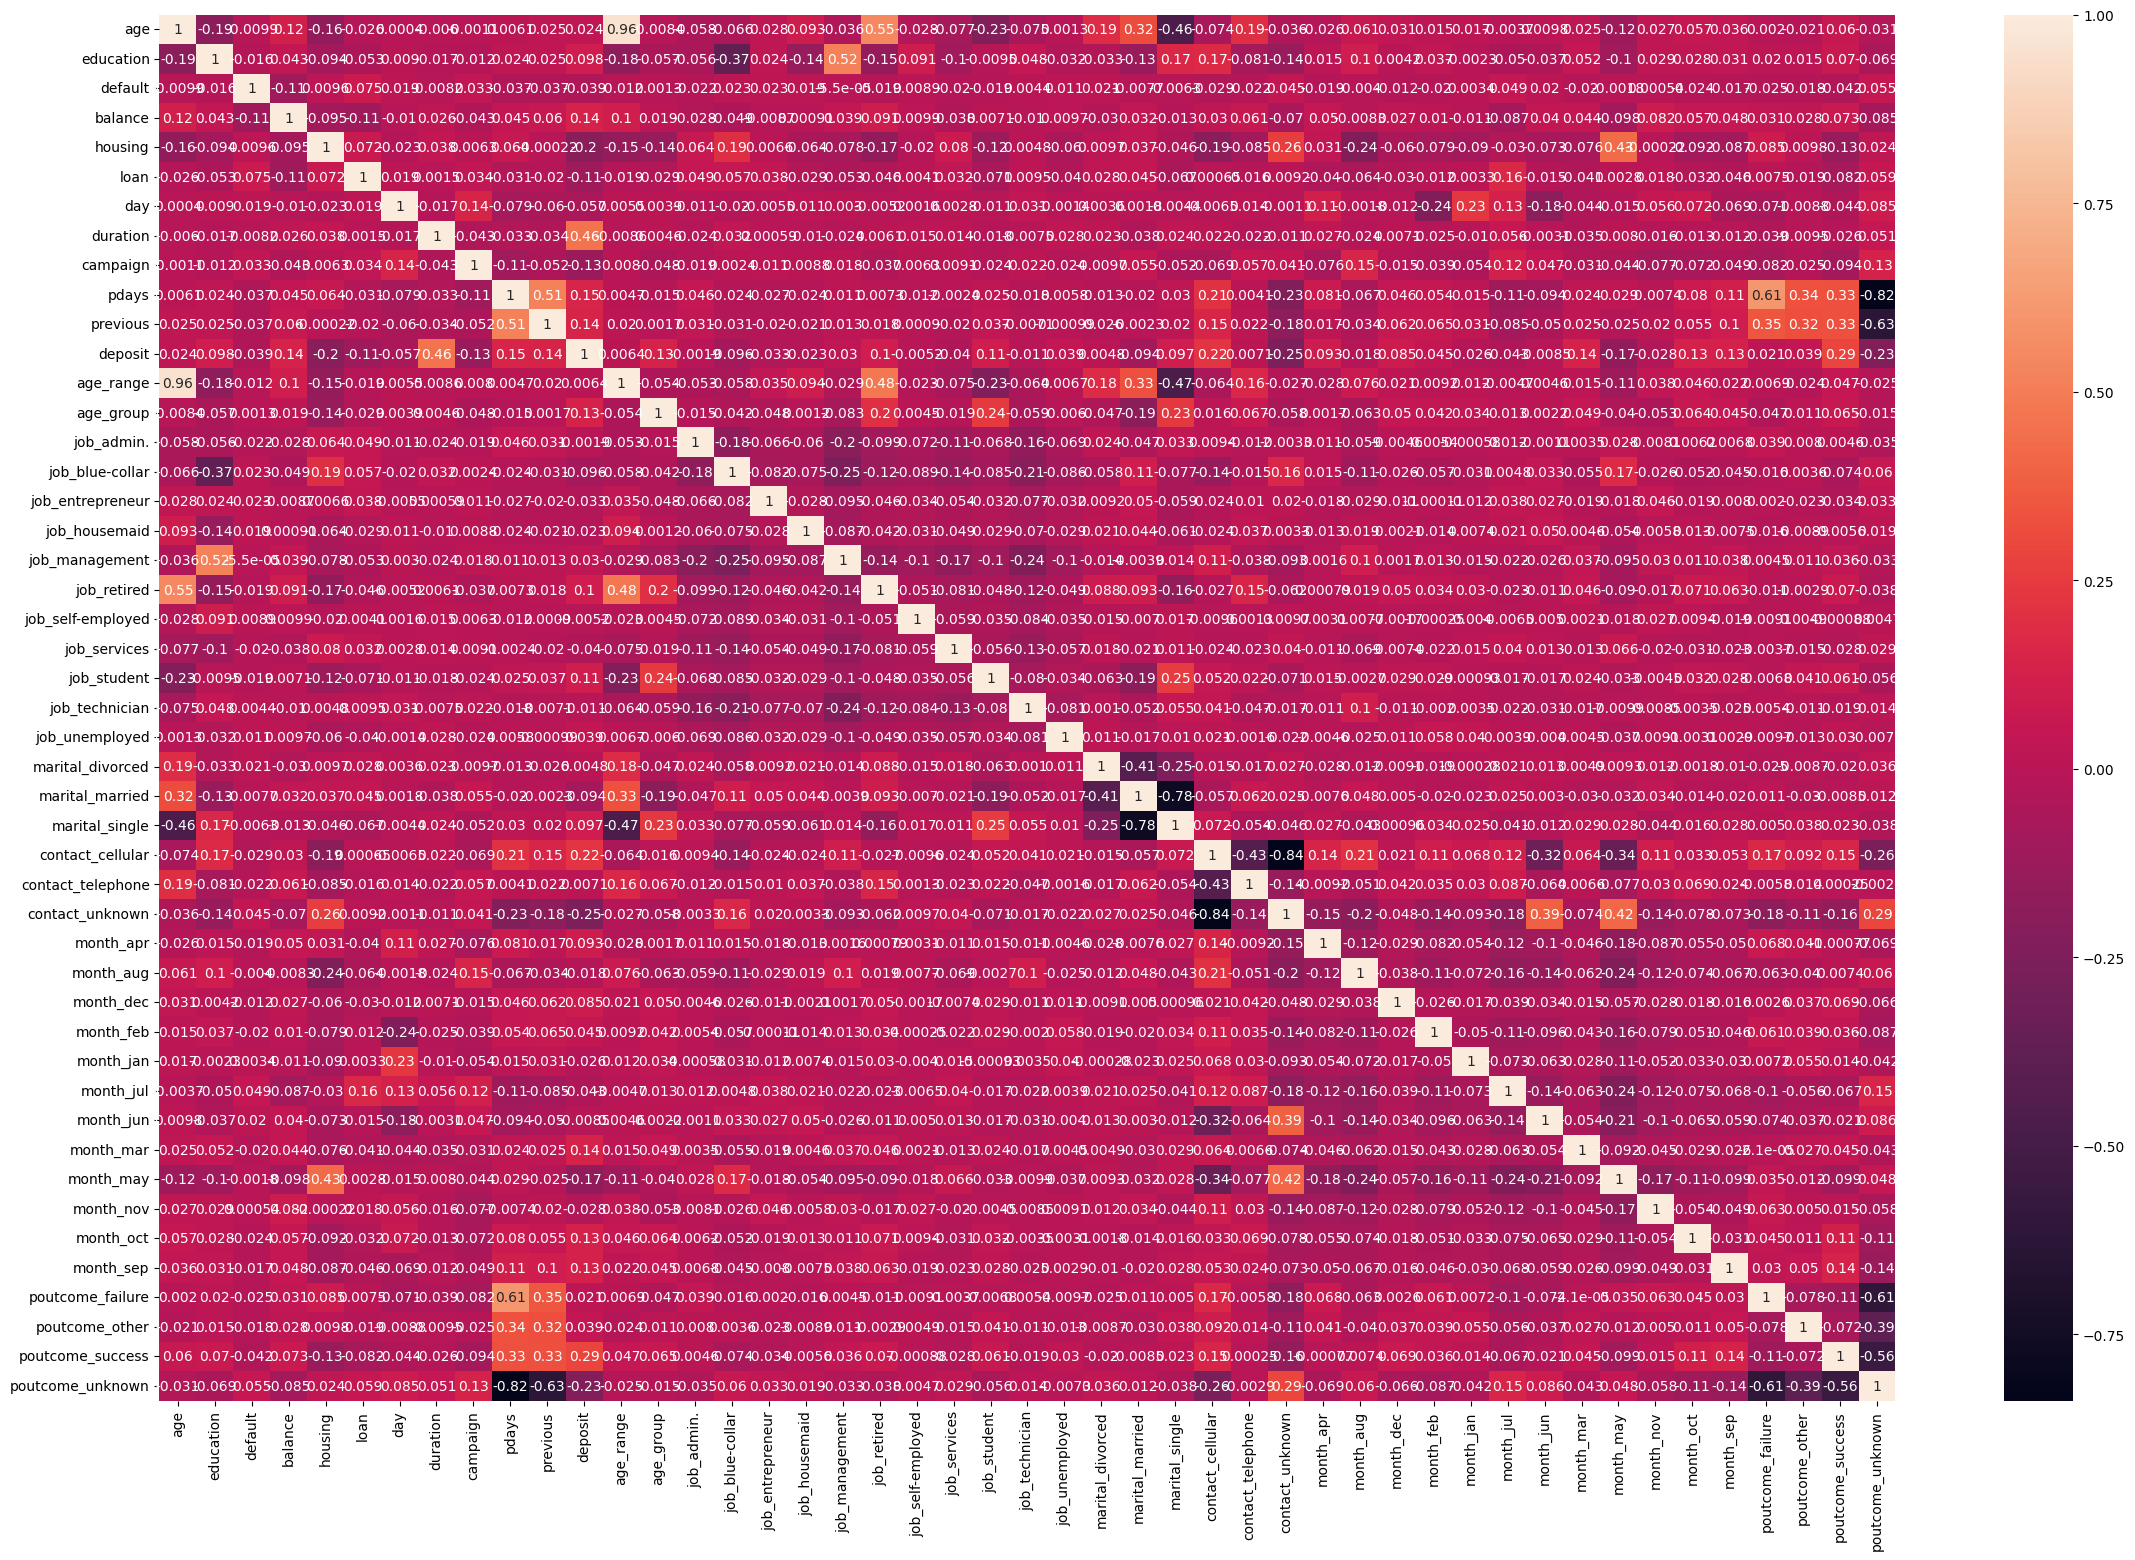

In [348]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
display(dummies_data.corr()['deposit'])
fig, ax = plt.subplots(figsize = (28, 18))
sns.heatmap(dummies_data.corr(), annot=True);

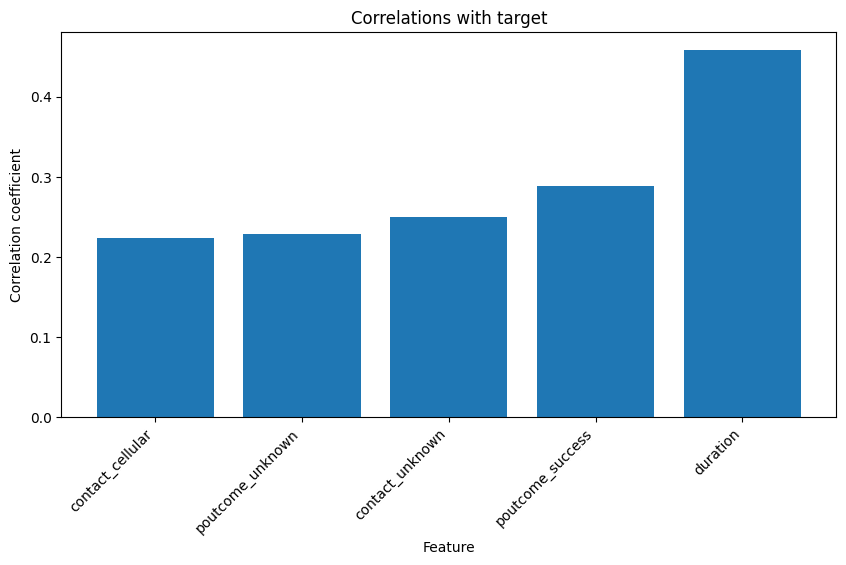

In [354]:
#Вычисляем модуль корреляции
corr_with_target = dummies_data.corr()['deposit'].abs().sort_values()[-6:-1]
#Удаляем корреляцию целевой переменной с самой собой
#corr_with_target = corr_with_target.drop('deposit')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');


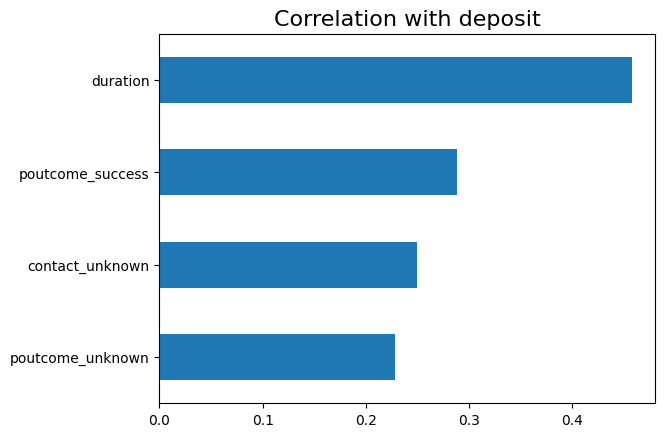

In [350]:
# Вспоминаем проект 3+
#corr_with_target = dummies_data.corr()['deposit'].abs().sort_values()
dummies_data.corr()['deposit'].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

### Задания 7 и 8

In [355]:
X = dummies_data.drop(['deposit'], axis=1)
y = dummies_data['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [356]:
# рассчитайте необходимые показатели
print(X_test.shape)
print(y_test.shape)
display(y_test)
print(round(y_test.mean(),2))

(3335, 46)
(3335,)


3333     1
6048     0
5675     0
2564     1
8983     0
        ..
1730     1
9672     0
8584     0
10972    0
3818     1
Name: deposit, Length: 3335, dtype: int64

0.46


### Задание 9

In [361]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(f_regression, k=15)
selector.fit(X_train, y_train)
 
display(selector.get_feature_names_out())

X = dummies_data[['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous','age_group', 
                 'contact_cellular', 'contact_unknown', 'month_mar','month_may', 'month_oct', 
                 'month_sep', 'poutcome_success','poutcome_unknown']]
y = dummies_data['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

['balance',
 'housing',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

### Задание 10

In [362]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)                           # fit() только на train данных
X_train_scaled = scaler.transform(X_train)    # fransform() на train данных
X_test_scaled = scaler.transform(X_test)      # fransform() на test данных

display(X_test_scaled[:, 0])

print(X_test_scaled[:, 0].mean())  # для признака balance, обратите внимание именно на столбец


array([0.36060209, 0.41901178, 0.56479058, ..., 0.28435864, 0.37614529,
       0.36878272])

0.46823674223097866


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [366]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(
    solver="sag",
    random_state=42,
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)
y_predicted = log_reg.predict(X_test_scaled)
 
#Модель log_reg_full:
#Рассчитываем accuracy
print('Accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_predicted)))
#Рассчитываем precision
print('Precision: {:.2f}'.format(metrics.precision_score(y_test, y_predicted)))
#Рассчитываем recall
print('Recall: {:.2f}'.format(metrics.recall_score(y_test, y_predicted)))
#Рассчитываем F1-меру
print('F1 score: {:.2f}'.format(metrics.f1_score(y_test, y_predicted)))

print(metrics.classification_report(y_test, y_predicted))

Accuracy: 0.81
Precision: 0.83
Recall: 0.74
F1 score: 0.78
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.81      3335
weighted avg       0.81      0.81      0.81      3335



### Задания 2,3,4

In [374]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42    
)

dt.fit(X_train_scaled, y_train)
y_predicted = dt.predict(X_test_scaled)


#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)
#X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)
print('Training Accuracy : ', metrics.accuracy_score(y_train, dt.predict(X_train_scaled))*100)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, dt.predict(X_test_scaled))*100)

#print(metrics.classification_report(y_test, y_predicted))

Training Accuracy :  100.0
Validation Accuracy :  74.87256371814092


In [375]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=5    
)

dt.fit(X_train_scaled, y_train)
y_predicted = dt.predict(X_test_scaled)

print('Training Accuracy : ', metrics.accuracy_score(y_train, dt.predict(X_train_scaled))*100)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, dt.predict(X_test_scaled))*100)

#print(metrics.classification_report(y_test, y_predicted))

Training Accuracy :  80.38404726735598
Validation Accuracy :  79.37031484257872


In [376]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42,
    max_depth=6
)

dt.fit(X_train_scaled, y_train)
y_predicted = dt.predict(X_test_scaled)

print('Training Accuracy : ', metrics.accuracy_score(y_train, dt.predict(X_train_scaled))*100)
print('Validation Accuracy : ', metrics.accuracy_score(y_test, dt.predict(X_test_scaled))*100)

#print(metrics.classification_report(y_test, y_predicted))

Training Accuracy :  81.80206794682422
Validation Accuracy :  80.65967016491754


### Задание 5

In [388]:
# подберите оптимальные параметры с помощью gridsearch

param_grid = {
   'max_depth':[3,5,7],
   'min_samples_split': [2, 5, 7, 10]
}

#grid_search = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), 
#                        param_grid,
#                        cv=3, 
#                        scoring=('f1'),
#                        return_train_score=True) 
   

grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring=('f1'),
    return_train_score=True,
)

grid_search.fit(X_train_scaled, y_train)

print("accuracy на тестовом наборе: {:.3f}".format(grid_search.score(X_test_scaled, y_test)))

y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))


print("Наилучшие значения параметров: {}".format(grid_search.best_params_))


#model_cv = GridSearchCV(tree.DecisionTreeClassifier(), 
#                        parameters,
#                        cv=3, scoring=('f1'), 
#                        return_train_score=True)

accuracy на тестовом наборе: 0.801
f1_score на тестовом наборе: 0.801
Наилучшие значения параметров: {'max_depth': 7, 'min_samples_split': 2}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [389]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)

y_predicted = rf.predict(X_test_scaled)

#print('Training Accuracy : ', metrics.accuracy_score(y_train, dt.predict(X_train_scaled))*100)
#print('Validation Accuracy : ', metrics.accuracy_score(y_test, dt.predict(X_test_scaled))*100)

print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задания 2 и 3

In [394]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
# Создаем модель градиентного бустинга
gb = ensemble.GradientBoostingClassifier(
    #loss='deviance', #функция потерь
    learning_rate=0.05, #темп обучения
    n_estimators=300, #число деревьев
    max_depth=5, #максимальная глубина дерева
    min_samples_leaf=5,
    random_state=42 #генератор случайных чисел
)
# Обучаем модель
gb.fit(X_train_scaled, y_train)
# Формируем предсказание для тестовой выборки
y_predicted = gb.predict(X_test_scaled)
# Посмотрим на основные метрики классификации
print(metrics.classification_report(y_test, y_predicted))



#gb = ensemble.GradientBoostingClassifier(
#    learning_rate=0.05,
#    n_estimators=300,
#    min_samples_leaf=5,
#    max_depth=5,
#    random_state=42
#)
#gb.fit(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1790
           1       0.80      0.83      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Задание 4

In [400]:
from sklearn.ensemble import StackingRegressor

# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

# Создаем объект класса стекинг
reg = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)

reg.fit(X_train_scaled, y_train)
# Формируем предсказание для тестовой выборки
y_predicted = reg.predict(X_test_scaled)
# Посмотрим на основные метрики классификации
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга


### Задания 6,7,8

In [403]:
import optuna

print("Версия Optuna: {}".format(optuna.__version__))

# реализуйте оптимизацию гиперпараметров с помощью Optuna
def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))


  return score

Версия Optuna: 3.1.1


In [404]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-06-30 22:35:32,098] A new study created in memory with name: RandomForestClassifier
[I 2023-06-30 22:35:33,303] Trial 0 finished with value: 0.9161168708765315 and parameters: {'n_estimators': 184, 'max_depth': 20, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.9161168708765315.
[I 2023-06-30 22:35:34,096] Trial 1 finished with value: 0.8758599124452783 and parameters: {'n_estimators': 145, 'max_depth': 17, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.9161168708765315.
[I 2023-06-30 22:35:34,965] Trial 2 finished with value: 0.8786362214576164 and parameters: {'n_estimators': 152, 'max_depth': 15, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9161168708765315.
[I 2023-06-30 22:35:35,864] Trial 3 finished with value: 0.8493579705606014 and parameters: {'n_estimators': 186, 'max_depth': 30, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9161168708765315.
[I 2023-06-30 22:35:36,576] Trial 4 finished with value: 0.8932707355242567 and parameters: {'n_

CPU times: total: 15.2 s
Wall time: 15.2 s


In [405]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))



Наилучшие значения гиперпараметров {'n_estimators': 121, 'max_depth': 28, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.92


In [411]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params, random_state=42)
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))



accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82


In [415]:
optuna.visualization.is_available()
optuna.visualization.plot_optimization_history(study, target_name="f1_score")


In [416]:
optuna.visualization.plot_param_importances(study, target_name="f1_score")


In [417]:
optuna.visualization.plot_contour(study, params=["max_depth", "n_estimators"],
                                  target_name="f1_score")